<a href="https://colab.research.google.com/github/dnevo/ImageProcessing/blob/main/ImageProcessingRecitation_13_Fourier3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import requests
from io import BytesIO
from ipywidgets import interactive
import matplotlib.pyplot as plt
import plotly.express as px
import PIL
from numpy.fft import fft2, ifft2, fftshift, ifftshift
import numpy as np
π = np.pi

In [3]:
GITHUB_PATH = 'https://raw.githubusercontent.com/dnevo/ImageProcessing/main/images/'

In [4]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image 
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [5]:
def plot_axis(splot, x, xlabel, y, ylabel, xlim=[], ylim=[]):
    splot.plot(x, y)
    if splot == plt:
        splot.xlabel(xlabel)
        splot.ylabel(ylabel)
        if xlim != []:
            plt.xlim(xlim)
        if ylim != []:
            plt.ylim(ylim)
    else:
        splot.set_xlabel(xlabel)
        splot.set_ylabel(ylabel)
        if xlim != []:
            splot.set_xlim(xlim)
        if ylim != []:
            splot.set_ylim(ylim)
    splot.axhline(y=0, color='k')
    splot.axvline(x=0, color='k')
    splot.grid()

#High Pass Filter (HPM)

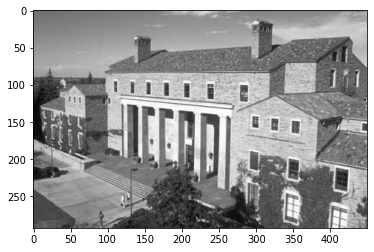

In [6]:
f1 = read_file(file_name='house.tiff') / 255
plt.imshow(f1, cmap='gray');

In [7]:
F1 = fft2(f1)
F1 = fftshift(F1)
F1a = np.log(np.abs(F1)**2)
F1a_min, F1a_max = F1a.min(), F1a.max()
fig = px.imshow(F1a, color_continuous_scale='gray', zmin=F1a_min, zmax=F1a_max)
fig.update_layout(coloraxis_showscale=False)

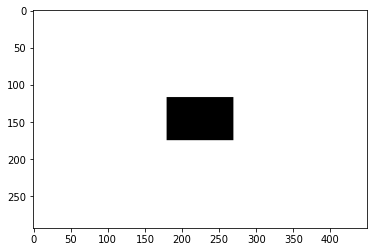

In [8]:
nrows, ncols = F1.shape
G1 = np.ones(F1.shape)
fh = int(nrows/10)
fw = int(ncols/10)
ch = int(nrows/2)
cw = int(ncols/2)

G1[ch-fh:ch+fh, cw-fw:cw+fw] = 0
plt.imshow(G1, cmap='gray');

In [9]:
H1 = F1 * G1
H1a = np.log(0.00001 +np.abs(H1)**2)
fig = px.imshow(H1a, color_continuous_scale='gray', zmin=F1a_min, zmax=F1a_max)
fig.update_layout(coloraxis_showscale=False)

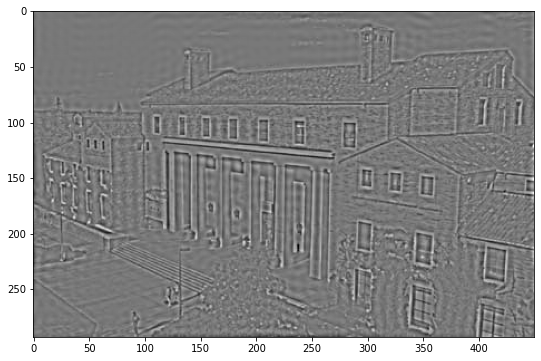

In [10]:
h1 = ifft2(ifftshift(H1)).real
plt.figure(figsize = (12,6))
plt.imshow(h1, cmap='gray');


##Q: We received an edges matrix. Why?

A: edges signify high changes / slopes. High changes relates with high frequencies.

#Low Pass Filter (LPM)

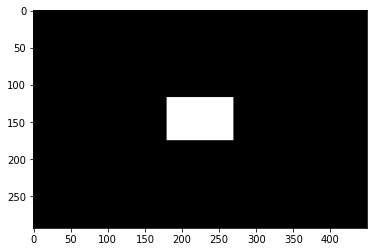

In [11]:
G2 = 1 - G1
G2[146,225] = 1
plt.imshow(G2, cmap='gray');

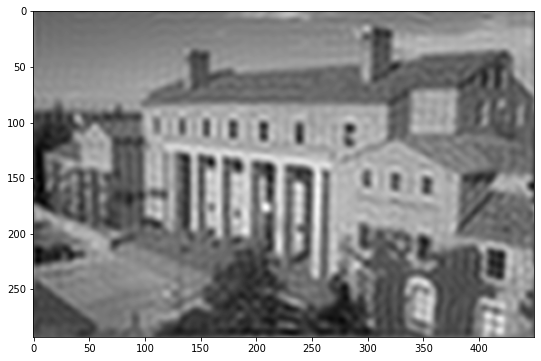

In [12]:
H2 = F1 * G2
h2 = ifft2(ifftshift(H2)).real
plt.figure(figsize = (12,6))
plt.imshow(h2, cmap='gray');

##Q: We received a smoothed matrix. Why?

A: high frequencies, i.e. edges were removed.

##Q: why there are ripples in the above resulting images

Recall the Convolution Theorem:

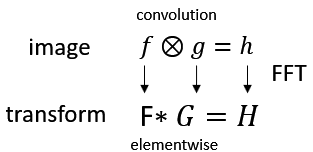

Note: the operation in the time domain is much more efficient than the operation in the image domain. Let's take example in 1d (vectors):
- Complexity of FFT algorithm is $o(n \log n)$, therefore in total also $o(n \log n)$.
- Complexity of the normal convolution operation is $o(n^2)$.

FFT of a gaussian is a gaussian:

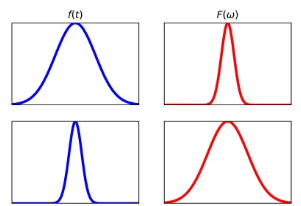

FFT of a wide Gaussian is a narrow Gaussian, (and vice versa).

Why? Wide Gaussian (more smoothing) mean "slow" modifications, therefore lower frequencies (and vice versa).


Therefore, if $g$ is a gaussian, then $G$ is a gaussian, and applying it, is applying a Low Pass Filter.

FFT of constant function is a point.
FFT of a point (the $\delta$ (delta) function) is a straight line.

#The Rectangular and the sinc functions

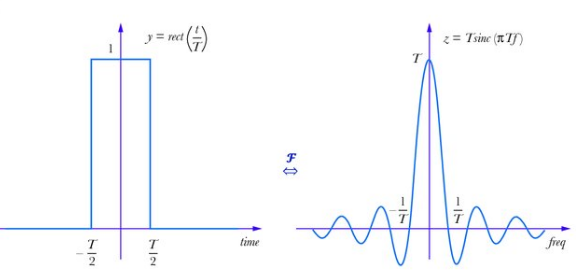

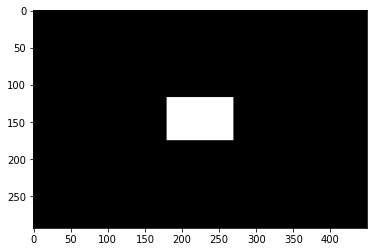

In [13]:
plt.imshow(G2, cmap='gray');

In [14]:
F3 = fft2(G2)
F3 = fftshift(F3)
F3a = np.log(0.0001 + np.abs(F3)**2)
fig = px.imshow(F3a, color_continuous_scale='gray')
fig.update_layout(coloraxis_showscale=False)

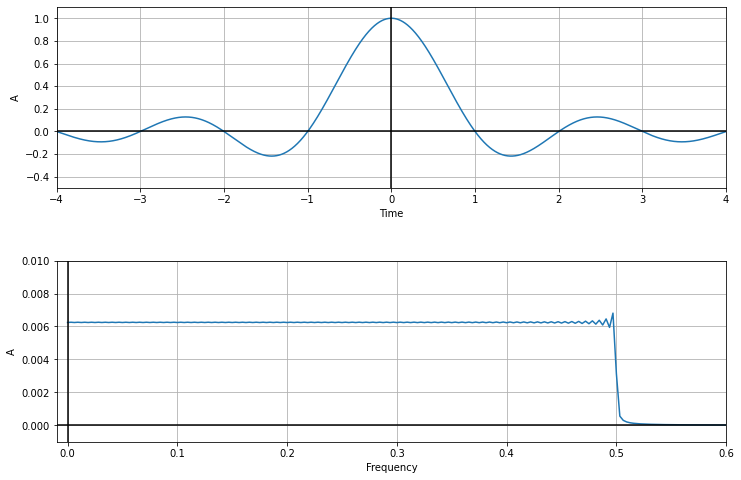

In [16]:
sampling_frequency = 500
sampling_interval = 1 / sampling_frequency
begin_time = -160
end_time = 160
x = np.arange(begin_time, end_time, sampling_interval)
y = np.sinc(x)
figure, axis = plt.subplots(2, 1, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)
plot_axis(splot=axis[0], x=x, xlabel='Time', y=y, ylabel='A', xlim=[-4, 4], ylim=[-0.5, +1.1])
fourier_transform = np.fft.fft(y)/len(y)           # Normalize amplitude
fourier_transform = fourier_transform[range(int(len(y)/2))] # Exclude sampling frequency
tp_count = len(y)
values = np.arange(tp_count // 2)
time_period = tp_count/sampling_frequency
frequencies = values/time_period
yv = 2*abs(fourier_transform)
plot_axis(splot=axis[1], x=frequencies, xlabel='Frequency', y=yv, ylabel='A',xlim=[-0.01,0.6], ylim=[-0.001,0.01])
plt.show()

The ripples are due to the sync function

#High Pass Filter

FFT of a constant function is the Dirac $\delta$ function (which is just the DC component).

$HPF = 1 - LPF$

The FFT of 1 (unit) function is the $\delta$ function

The FFT of Gaussian $G$ is a Gaussian

Therefore $HPF\approx \delta-G$.



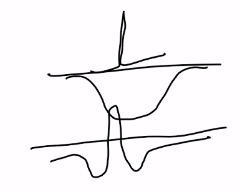

And this is a mexican hat.